In [64]:
import numpy as np
import pandas as pd
from datetime import datetime
import re 
import matplotlib.pyplot as plt
import seaborn as sns  

In [31]:
df = pd.read_csv('AEF.AX.csv')

In [33]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-30,3.38,3.39,3.21,3.36,3.303808,235928
1,2023-07-03,3.38,3.38,3.27,3.30,3.244812,126489
2,2023-07-04,3.27,3.48,3.24,3.44,3.382470,202702
3,2023-07-05,3.44,3.46,3.31,3.37,3.313641,171352
4,2023-07-06,3.34,3.35,3.16,3.20,3.146484,95553


In [35]:
print(df.shape)

(253, 7)


In [37]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,4.562292,4.661443,4.468715,4.581542,4.555399,127893.316206
std,0.539508,0.548082,0.532818,0.540742,0.549048,71092.799279
min,3.110000,3.200000,3.090000,3.150000,3.097320,13299.000000
25%,4.220000,4.300000,4.110000,4.250000,4.225049,79895.000000
50%,4.580000,4.680000,4.460000,4.600000,4.592877,110475.000000
75%,4.950000,5.010000,4.830000,4.950000,4.930000,163375.000000
max,5.750000,5.780000,5.510000,5.700000,5.666536,533808.000000


Check if data require cleaning 

In [40]:
## check data type and other info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [71]:
##check any na value 
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [99]:
## check null value 
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [75]:
##check if data is duplicated

df.duplicated().sum()

0

##check date is consistant 


In [25]:
df['Date'].describe()

count            253
unique           253
top       2023-06-30
freq               1
Name: Date, dtype: object

In [42]:
date_formate = re.compile(r'\d{4}-\d{2}-\d{2}$')

In [46]:
for line in df['Date']:
    if not re.match(date_formate, line):
        print('date column not consistance')

## Buidling plots 

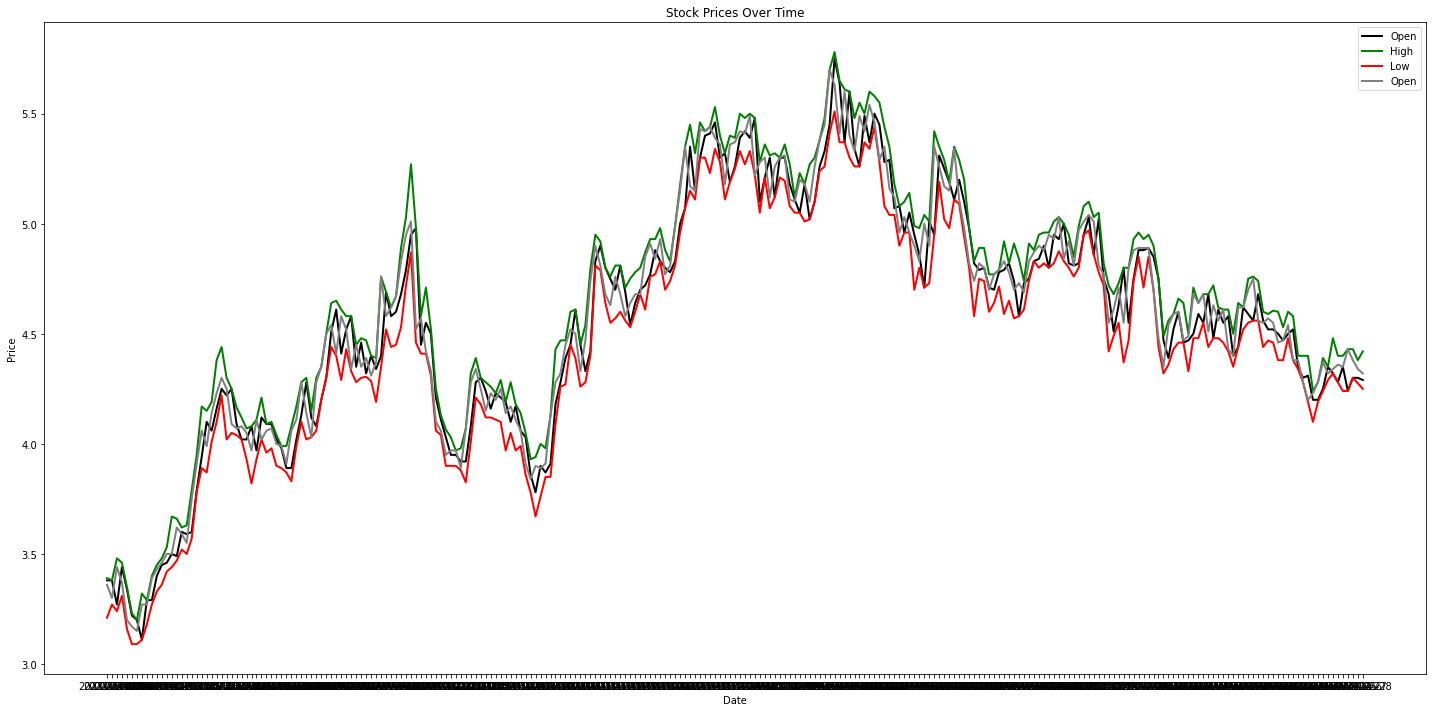

In [89]:
##Line chart to shows trends 
## Open	High	Low	 Close	Adj Close
plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['Open'], marker='', linestyle='-', color='black', linewidth=2, label='Open')
plt.plot(df['Date'], df['High'], marker='', color='green', linewidth=2, label='High')
plt.plot(df['Date'], df['Low'], marker='', color='red', linewidth=2, label='Low')
plt.plot(df['Date'], df['Close'], marker='', linestyle='-', color='gray', linewidth=2, label='Open')

# Add labels and title
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

##Quaterly data / average data 

In [135]:
df['Date'] = pd.to_datetime(df['Date'])

In [141]:
##Q1 0.25. Calulate date coulumn

q_df = pd.DataFrame(df)

q_df['Quartile'] = pd.qcut(q_df['Date'],  q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

q_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quartile
0,2023-06-30,3.38,3.39,3.21,3.36,3.303808,235928,Q1
1,2023-07-03,3.38,3.38,3.27,3.30,3.244812,126489,Q1
2,2023-07-04,3.27,3.48,3.24,3.44,3.382470,202702,Q1
3,2023-07-05,3.44,3.46,3.31,3.37,3.313641,171352,Q1
4,2023-07-06,3.34,3.35,3.16,3.20,3.146484,95553,Q1
